In [9]:
import pandas as pd
import sklearn.datasets
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
import sys
# 2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from category_encoders import OrdinalEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [27]:
# Define the path to your CSV file
path = r"C:\Users\hp\Research-Try-ML\Adana_Earthdata\Adana_Data(csv).csv"

# Read the CSV file with the correct delimiter
df = pd.read_csv(path, delimiter=';', encoding='latin1')
df

,Date(d.m.y),Temperature (°F),Dew Point (°F),Humidity (%),Wind Speed (mph),Pressure (in),Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,1.01.2007,41.2,22.7,53.8,2.6,30.3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.01.2007,46.4,29.1,58.7,2.5,30.3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.01.2007,50.9,39.6,67.4,4.7,30.2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.01.2007,53.4,28.0,45.4,12.3,30.1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.01.2007,48.3,29.5,53.1,11.8,29.8,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6206,29.12.2023,58.6,47.0,68.1,7.1,30.1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6207,30.12.2023,58.0,45.3,66.8,2.7,30.1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6208,31.12.2023,54.7,41.8,67.0,3.3,30.1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## create factor analyzer variable and perform factor analyses

In [28]:
fa = FactorAnalyzer(n_factors=4, rotation="varimax")

In [29]:
df

,Date(d.m.y),Temperature (°F),Dew Point (°F),Humidity (%),Wind Speed (mph),Pressure (in),Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,1.01.2007,41.2,22.7,53.8,2.6,30.3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.01.2007,46.4,29.1,58.7,2.5,30.3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.01.2007,50.9,39.6,67.4,4.7,30.2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.01.2007,53.4,28.0,45.4,12.3,30.1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.01.2007,48.3,29.5,53.1,11.8,29.8,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6206,29.12.2023,58.6,47.0,68.1,7.1,30.1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6207,30.12.2023,58.0,45.3,66.8,2.7,30.1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6208,31.12.2023,54.7,41.8,67.0,3.3,30.1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# Load data (assuming it's already loaded as df)

# 1. Drop 'Unnamed' columns
df_cleaned = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# 2. Drop rows where all values are NaN
df_cleaned = df_cleaned.dropna(how='all')

# 3. Drop Date column if not needed
df_cleaned = df_cleaned.drop(columns=['Date(d.m.y)'])

# 4. Convert all columns to numeric
df_cleaned = df_cleaned.apply(pd.to_numeric, errors='coerce')

# 5. Handle any remaining NaN values (fill with mean)
df_cleaned = df_cleaned.fillna(df_cleaned.mean())

In [34]:
df_cleaned.head()

,Temperature (°F),Dew Point (°F),Humidity (%),Wind Speed (mph),Pressure (in)
0,41.2,22.7,53.8,2.6,30.3
1,46.4,29.1,58.7,2.5,30.3
2,50.9,39.6,67.4,4.7,30.2
3,53.4,28.0,45.4,12.3,30.1
4,48.3,29.5,53.1,11.8,29.8


In [35]:
fa = FactorAnalyzer(n_factors=4, rotation="varimax")
fa.fit(df_cleaned)

FactorAnalyzer(n_factors=4, rotation='varimax', rotation_kwargs={})

In [36]:
# GET the loadings
loadings = fa.loadings_

In [37]:
# Get the EigenVector and EigenValues
ev, v = fa.get_eigenvalues()

In [38]:
# Do a screen plot
xvals = range(1, df_cleaned.shape[1]+1)

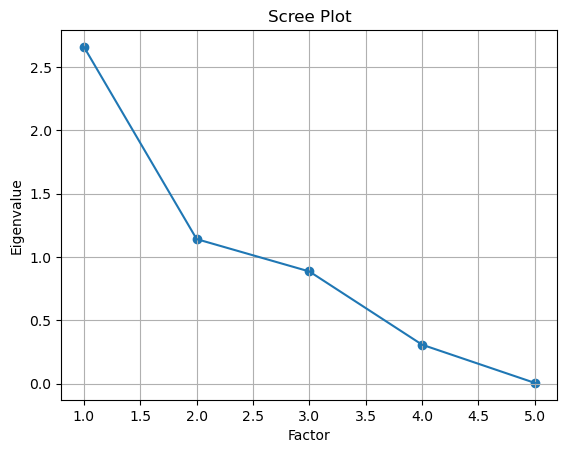

In [39]:
plt.scatter(xvals, ev)
plt.plot(xvals, ev)
plt.title("Scree Plot")
plt.xlabel("Factor")
plt.ylabel("Eigenvalue")
plt.grid()
plt.show()

In [40]:
pd.DataFrame.from_records(loadings)

,0,1,2,3
0,0.993108,-0.054803,0.075436,0.015412
1,0.899903,0.420548,0.083325,0.039899
2,0.140424,0.984258,0.077695,-0.023239
3,-0.009653,-0.057624,-0.589559,-0.013107
4,-0.717402,-0.194122,0.394596,0.273620
